In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
%config InLineBackend.figure_format = 'retina'

In [2]:
print(f'pandas version: {pd.__version__}')
print(f'numpy version: {np.__version__}')
print(f'seaborn version: {sns.__version__}')

pandas version: 1.1.0
numpy version: 1.19.1
seaborn version: 0.10.1


In [3]:
df=pd.read_csv('OAT.csv')
df.head()

,data,gdp,val
0,158,81.2,12565.0
1,159,81.2,13103.0
2,160,81.2,13571.0
3,161,81.2,13470.0
4,162,81.2,13341.0


In [6]:
df.info()
cols=['data','gdp','val']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   data    60 non-null     int64  
 1   gdp     60 non-null     float64
 2   val     60 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.5 KB


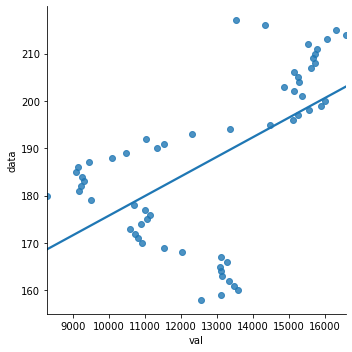

In [18]:
sns.lmplot(x='val',y='data',data=df, ci=None,)
scatter_kws={'alpha':0.4}
line_kws={'color':'orange'}

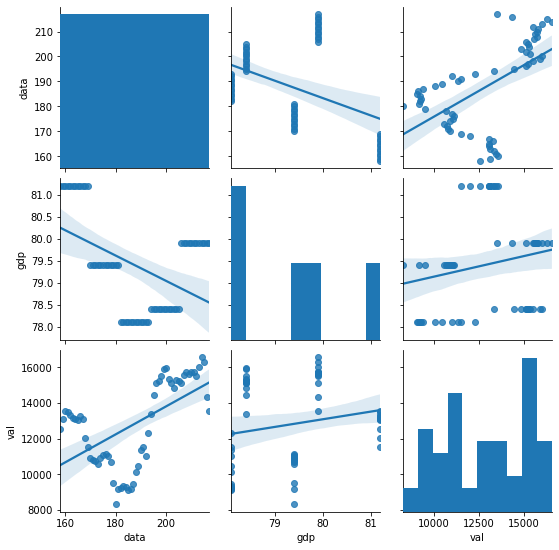

In [19]:
sns.pairplot(df, kind='reg')

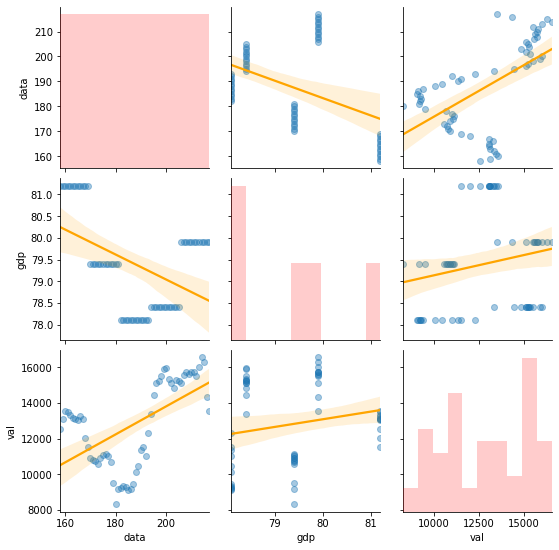

In [22]:
sns.pairplot(df,
             kind='reg',
             plot_kws={'scatter_kws':{'alpha':0.4},
                       'line_kws':{'color':'orange'}},
             diag_kws={'color':'red','alpha':.2})


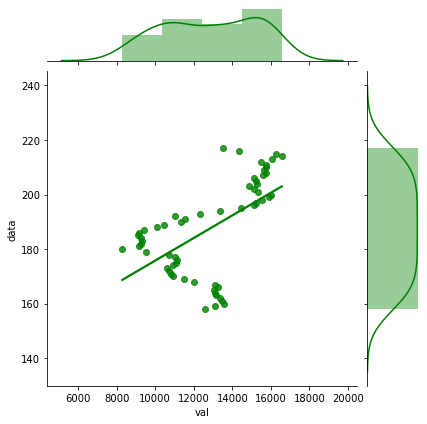

In [25]:
sns.jointplot(x='val',y='data', data=df, kind='reg', ci=None, color='green' );

In [26]:
import sklearn
from sklearn.linear_model import LinearRegression

In [27]:
print(f'sklearn version: {sklearn.__version__}')

sklearn version: 0.23.2


In [41]:
model = LinearRegression()
model

LinearRegression()

In [42]:
len(df)

60

In [49]:
x=df.drop(columns=['data'])[:50]
y=df['data'][:50]

In [50]:
len(x)

50

In [51]:
x.head()

,gdp,val
0,81.2,12565.0
1,81.2,13103.0
2,81.2,13571.0
3,81.2,13470.0
4,81.2,13341.0


In [52]:
model.fit(x,y)

LinearRegression()

In [53]:
model.score(x,y)

0.8387344378568218

In [54]:
model.intercept_

944.5697481800801

In [55]:
model.coef_

array([-1.01009142e+01,  3.16754302e-03])

In [58]:
model.predict([[79,15000],
              [100,13000],
              [76,11000]])

array([194.11067506, -24.34360829, 211.74324545])

In [63]:
x_test=df.drop(columns=['data'])[50:]
x_test.head()

,gdp,val
50,79.9,15720.80
51,79.9,15646.16
52,79.9,15725.95
53,79.9,15770.97
54,79.9,15508.10


In [72]:
y_hat=model.predict(x_test)
y_hat

array([187.30301733, 187.06659192, 187.31933018, 187.46193296,
       186.62928093, 188.29816432, 189.96907494, 189.10813675,
       182.87276496, 180.36093502])

In [75]:
dc=pd.concat([df[50:].reset_index(),pd.Series(y_hat, name='predicted')], axis='columns')
dc

,index,data,gdp,val,predicted
0,50,208,79.9,15720.80,187.303017
1,51,209,79.9,15646.16,187.066592
2,52,210,79.9,15725.95,187.319330
3,53,211,79.9,15770.97,187.461933
4,54,212,79.9,15508.10,186.629281
5,55,213,79.9,16034.97,188.298164
6,56,214,79.9,16562.48,189.969075
7,57,215,79.9,16290.68,189.108137
8,58,216,79.9,14322.16,182.872765
9,59,217,79.9,13529.17,180.360935


In [79]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [86]:
model_a = smf.ols(formula='gdp ~ data+val ', data=df [:50]).fit()

In [87]:
print(model_a.summary())

                            OLS Regression Results                            
Dep. Variable:                    gdp   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     101.9
Date:                Thu, 27 Aug 2020   Prob (F-statistic):           8.06e-18
Time:                        05:40:21   Log-Likelihood:                -37.897
No. Observations:                  50   AIC:                             81.79
Df Residuals:                      47   BIC:                             87.53
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     90.6624      0.957     94.767      0.0

In [88]:
model_a.params

Intercept    90.662424
data         -0.080186
val           0.000266
dtype: float64

In [89]:
model_a.pvalues

Intercept    2.527772e-55
data         1.447362e-18
val          3.371410e-09
dtype: float64

In [90]:
model.intercept_

944.5697481800801

In [93]:
model.coef_

array([-1.01009142e+01,  3.16754302e-03])